In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
def normalize(df):
    for col in df.columns:
        if (df[col].dtype=="int64" or df[col].dtype=="float64"):
            minval = df[col].min()
            maxval = df[col].max()
            df[col]= (df[col]-minval)/(maxval-minval)

normalize(df)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,Algeria,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,Antigua and Barbuda,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [5]:
df.drop('gdpp', axis=1, inplace=True)
df.drop('country', axis=1, inplace=True)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574


In [6]:
class HierarchicalClustering:
    def __init__(self, n_clusters=3):
        self.n_clusters = n_clusters

    def fit(self, X):
        self.X = X
        self.labels_ = np.arange(X.shape[0])
        self.clusters = [[i] for i in range(X.shape[0])]
        
        while len(self.clusters) > self.n_clusters:
            min_distance = float('inf')
            merge_indices = None
            
            for i in range(len(self.clusters)):
                for j in range(i + 1, len(self.clusters)):
                    dist = self._cluster_distance(self.clusters[i], self.clusters[j])
                    if dist < min_distance:
                        min_distance = dist
                        merge_indices = (i, j)
            
            self._merge_clusters(merge_indices[0], merge_indices[1])

        for i, cluster in enumerate(self.clusters):
            for idx in cluster:
                self.labels_[idx] = i
                
        return self.labels_

    def _cluster_distance(self, cluster1, cluster2):
        distances = [np.linalg.norm(self.X[i] - self.X[j]) for i in cluster1 for j in cluster2]
        return np.min(distances)

    def _merge_clusters(self, index1, index2):
        self.clusters[index1].extend(self.clusters[index2])
        self.clusters.pop(index2)

In [7]:
x = df.to_numpy()

In [16]:
hc = HierarchicalClustering(n_clusters=3)
cluster = hc.fit(x)

In [17]:
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
df['cluster'] = cluster
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,cluster
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0


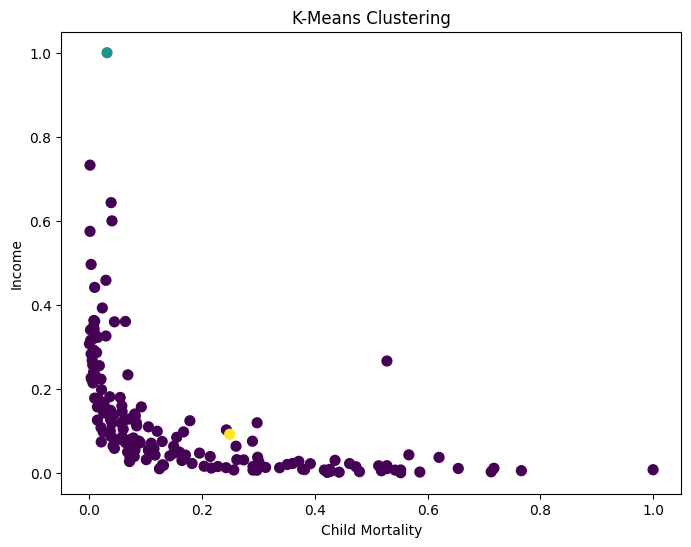

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(df['child_mort'], df['income'], c=df['cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Child Mortality')
plt.ylabel('Income')
plt.show()

In [20]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        return np.array([self._predict(x) for x in X_test])

    def _predict(self, x):
        distances = [np.sqrt(np.sum((x - x_train) ** 2)) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        labels, counts = np.unique(k_nearest_labels, return_counts=True)
        return labels[np.argmax(counts)]

In [21]:
train = int(len(x) * 0.8)

shuffled_df = df.sample(frac=1).reset_index(drop=True)

x = shuffled_df.drop('cluster', axis=1, inplace=False)
y = shuffled_df['cluster']
x=x.to_numpy()
y=y.to_numpy()
x_train = x[:train]
x_test = x[train:]
y_train = y[:train]
y_test = y[train:]

knn = KNN()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [22]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def precision(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    predicted_positives = np.sum(y_pred == 1)
    return true_positives / predicted_positives if predicted_positives > 0 else 0

def recall(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    actual_positives = np.sum(y_true == 1)
    return true_positives / actual_positives if actual_positives > 0 else 0

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r) if (p + r) > 0 else 0

In [23]:
print(accuracy(y_test,y_pred))
print(f1_score(y_test,y_pred))

1.0
0
